In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
boston = load_boston()
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
x=X['AGE'].values

In [4]:
#1次関数
lin_1d = LinearRegression()
lin_1d.fit(x[:,None],y)
print(lin_1d.coef_)
print(lin_1d.intercept_)

[-0.10368286]
28.1413682478


In [5]:
#2次関数
degree_2=PolynomialFeatures(degree=2)
x_2=degree_2.fit_transform(x[:,None])
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)
print(lin_2d.coef_)
print(lin_2d.intercept_)

[ 0.          0.12535185 -0.00209454]
23.4509449306


In [6]:
#3次関数
degree_3=PolynomialFeatures(degree=3)
x_3=degree_3.fit_transform(x[:,None])
lin_3d = LinearRegression()
lin_3d.fit(x_3,y)
print(lin_3d.coef_)
print(lin_3d.intercept_)

[  0.00000000e+00  -1.15561775e-01   3.50812212e-03  -3.56175826e-05]
25.8351818608


In [7]:
#4次関数
degree_4=PolynomialFeatures(degree=4)
x_4=degree_4.fit_transform(x[:,None])
lin_4d = LinearRegression()
lin_4d.fit(x_4,y)
print(lin_4d.coef_)
print(lin_4d.intercept_)

[  0.00000000e+00  -2.34145407e-01   8.37985150e-03  -1.07185705e-04
   3.43443205e-07]
26.537052513


[]

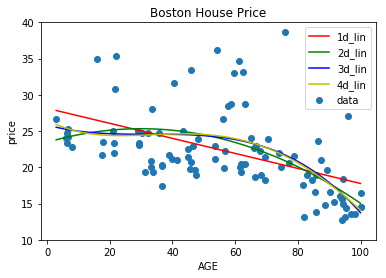

In [11]:
#結果のプロット
xt = np.linspace(np.min(x), np.max(x), num=100)

y_1d_fit=lin_1d.predict(xt[:,np.newaxis])
y_2d_fit=lin_2d.predict(degree_2.fit_transform(xt[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(xt[:,np.newaxis]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(xt[:,np.newaxis]))

plt.scatter(x,y,label='data')
plt.plot(xt,y_1d_fit,'r',label='1d_lin')
plt.plot(xt,y_2d_fit,'g',label='2d_lin')
plt.plot(xt,y_3d_fit,'b',label='3d_lin')
plt.plot(xt,y_4d_fit,'y',label='4d_lin')

plt.ylim(10,40)
plt.title("Boston House Price")
plt.xlabel("AGE")
plt.ylabel("price")
plt.legend()
plt.plot()

In [12]:
#1次関数の2乗和誤差
mean_squared_error(y,lin_1d.predict(x[:,None]))

26.754508704139507

In [13]:
#2次関数の2乗和誤差
mean_squared_error(y,lin_2d.predict(x_2))

24.397088136515954

In [14]:
#3次関数の2乗和誤差
mean_squared_error(y,lin_3d.predict(x_3))

23.978242199677435

In [15]:
#4次関数の2乗和誤差
mean_squared_error(y,lin_4d.predict(x_4))

23.95681697681929